<a href="https://colab.research.google.com/github/Zurcaid/MachineLearning/blob/main/PatricLacouth/sect_arvores_decisao_exemplo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# árvores de decisão + arduino




Uma empresa especializada em automação ambiental deseja desenvolver um sistema inteligente para gerenciar os equipamentos de controle em estufas agrícolas. Este sistema deve tomar decisões automáticas com base em dados coletados por sensores, para garantir um ambiente ideal para o crescimento das plantas.

Os sensores instalados monitoram as seguintes variáveis:

1. **Umidade do Solo (%):** Mede o nível de umidade no solo, indicando se é necessário irrigar as plantas.
2. **Concentração de Gás (ppm):** Detecta níveis de gases no ar, sinalizando se é necessário ativar a ventilação para renovar o ar.
3. **Nível de Luz Ambiente (lux):** Mede a quantidade de luz disponível no ambiente.
4. **Temperatura (Celsius):** Mede a temperatura do ambiente.

Com base nos dados coletados, o sistema deve decidir entre as seguintes ações:

- **Ativar Irrigação:** Quando a umidade do solo estiver baixa.
- **Ativar Ventilação:** Quando a concentração de gás estiver alta.
- **Manter Configuração Padrão:** Quando os níveis estiverem dentro de uma faixa ideal.

### Tarefa

1. **Objetivo:**
   Treine uma árvore de decisão que seja capaz de prever a ação apropriada com base nos valores das variáveis monitoradas.

2. **Passos:**
   - Utilize o conjunto de dados fornecido, que contém os valores de sensores e as ações recomendadas pelos especialistas.
   - Divida os dados em conjuntos de treino e teste.
   - Treine um modelo de árvore de decisão e avalie seu desempenho.
   - Analise as regras geradas pela árvore para entender como o modelo toma decisões.

3. **Entrega Esperada:**
   - Um modelo treinado que pode prever a ação com base nos valores dos sensores.
   - Uma explicação clara das regras da árvore de decisão.

# Bibliotecas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

import pandas as pd

# Lendo os dados de um arquivo CSV

In [ ]:
df = pd.read_csv('dados_sensores.csv')
print(f"Total de linhas do arquivo: {len(df)}")
df.head()

# Organizando os dados

In [ ]:

# Separando os dados em recursos (X) e rótulos (y)
X = df.drop("Ação", axis=1)
y = df["Ação"]

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando a árvore de decisão

In [ ]:
# Criando e treinando o modelo de árvore de decisão com os novos dados
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = tree.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
accuracy
print(f"Acurácia da Árvore de Decisão: {accuracy * 100:.2f}%")

# Verificando as regras encontradas pelo modelo

In [ ]:
# Plotando a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(tree,
          feature_names=X.columns,
          class_names=tree.classes_,
          filled=True,
          fontsize=12)
plt.show()

# Instalado a biblioteca que converte o modelo de Python para C++

https://github.com/eloquentarduino/micromlgen

micromlgen can port to plain C many types of classifiers:

* DecisionTree
* RandomForest
* XGBoost
* GaussianNB
* Support Vector Machines (SVC and OneClassSVM)
* Relevant Vector Machines (from skbayes.rvm_ard_models package)
* SEFR
* PCA



In [ ]:
!pip install micromlgen

In [ ]:
from micromlgen import port

In [ ]:
class_map = {0: 'Ativar Irrigacao', 1: 'Ativar Ventilacao', 2: 'Manter Configuracao Padrao'}

In [ ]:
with open('ArvoreDecisao.h', 'w') as file:
        file.write(port(tree,classmap = class_map))

# TinkerCad

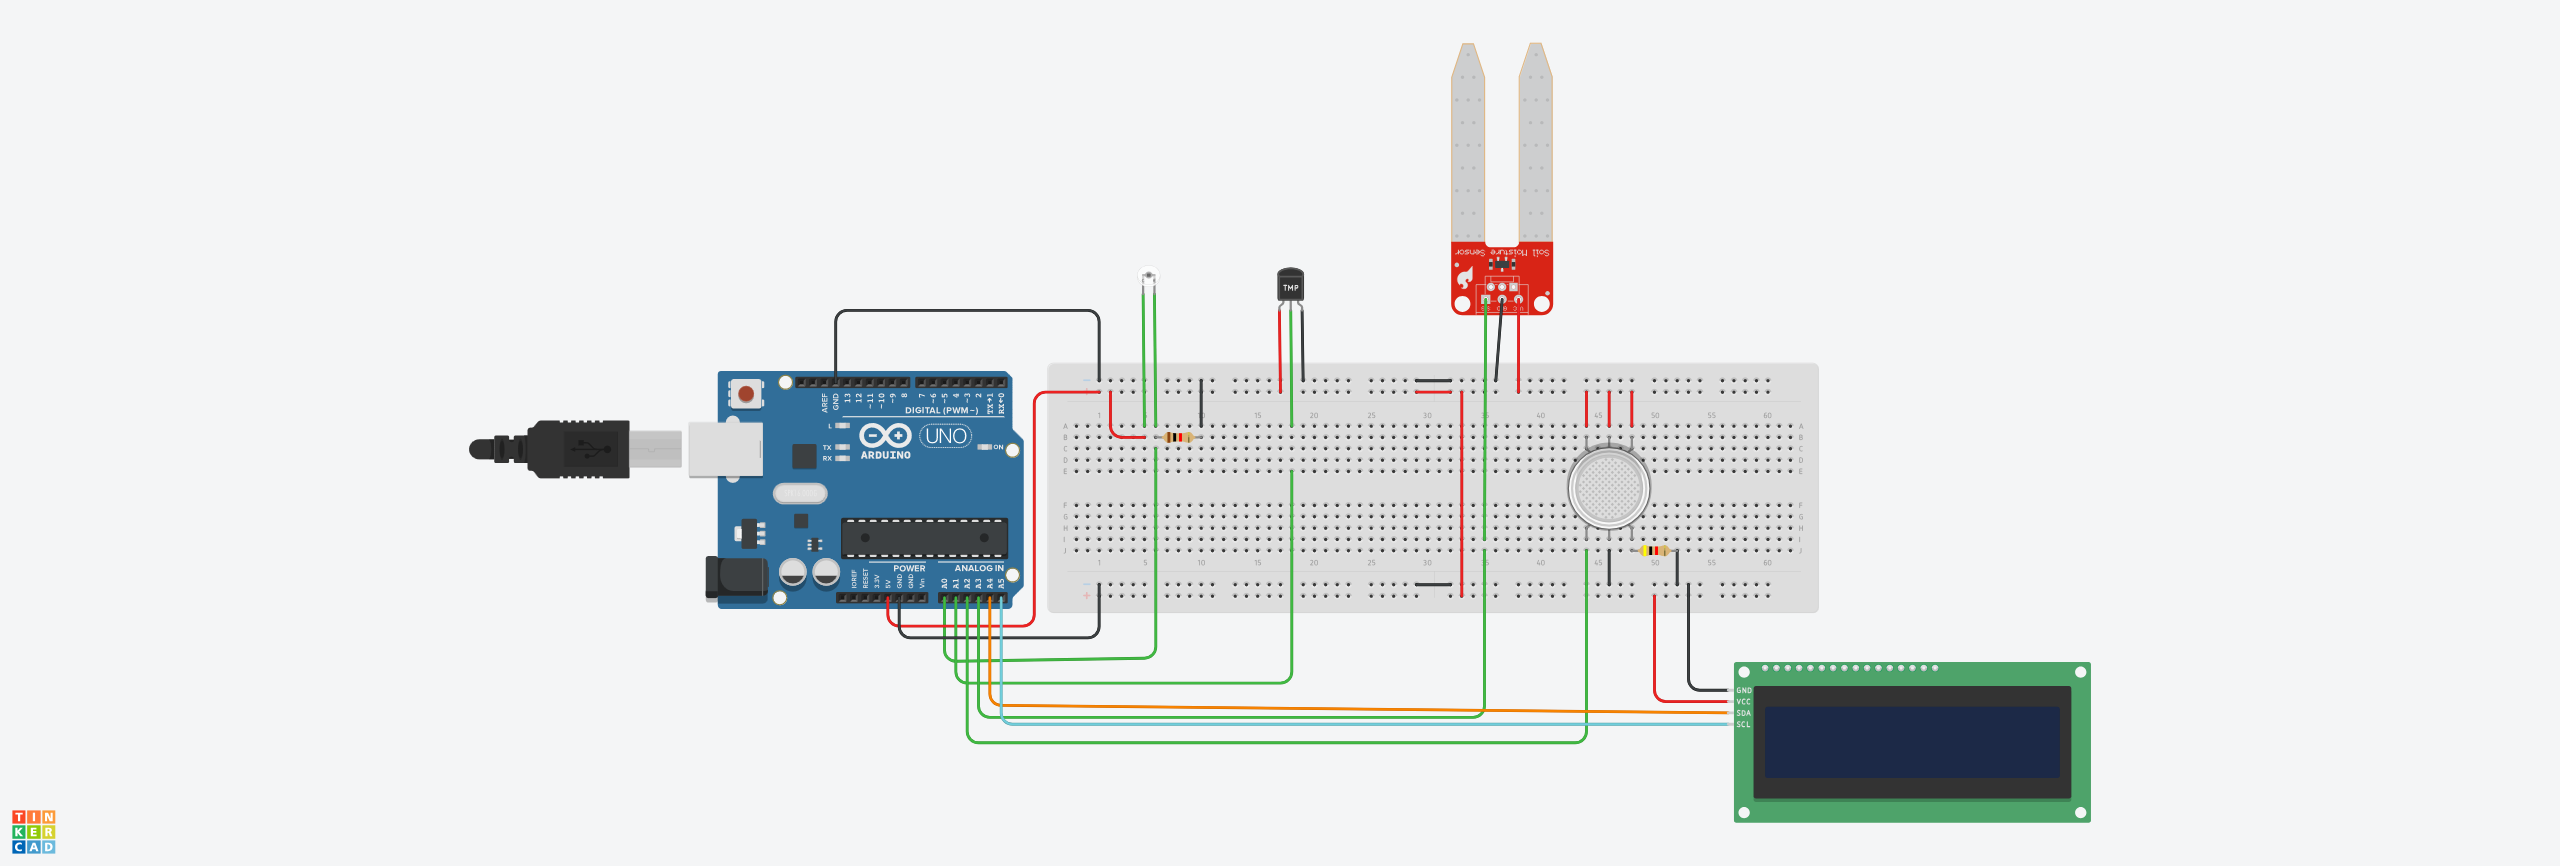

[Simulador dos Sensores](https://www.tinkercad.com/things/fgKyPrui396/editel?sharecode=_K04pshmL1HZFjGdMoFgE8TgTNTJdQbFIzNikBG1RfQ)